# **Machine learning for mental Health**

##### The project involves machine learning models that can assist in predicting mental health conditions, analyzing mental health-related data and creating tools that help in diagnosing or monitoring mental health conditions.


##### Our main objective is to predict whether a patient should be treated of his/her mental illness or not according to the values obtained in the dataset? 

##### Output Label is = seek_help 
##### Features = Age, Gender, self_employed, family_history, treatment, no_employees remote_work,tech_company, benefits, care_options, wellness_program seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence coworkers, supervisor, mental_health_interview, phys_health_interview mental_vs_physical, obs_consequence

### **1. Imports**

In [195]:
import pandas as pd
import numpy as np

### **2. Data Preprocessing**

In [196]:
path = 'survey.csv'
data = pd.read_csv(path)

In [197]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [198]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [200]:
data.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [201]:
data.drop(['comments', 'state', 'Timestamp'],  axis=1, inplace=True)

In [202]:
data.isna().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [203]:
# Assuming your DataFrame is called 'Data'
missing_percentages = (data.isna().mean() * 100).round(2)

print(missing_percentages)

Age                           0.00
Gender                        0.00
Country                       0.00
self_employed                 1.43
family_history                0.00
treatment                     0.00
work_interfere               20.97
no_employees                  0.00
remote_work                   0.00
tech_company                  0.00
benefits                      0.00
care_options                  0.00
wellness_program              0.00
seek_help                     0.00
anonymity                     0.00
leave                         0.00
mental_health_consequence     0.00
phys_health_consequence       0.00
coworkers                     0.00
supervisor                    0.00
mental_health_interview       0.00
phys_health_interview         0.00
mental_vs_physical            0.00
obs_consequence               0.00
dtype: float64


#### **Cleaning the NaN values**

In [204]:
data = data.dropna()
print(data)

      Age Gender        Country self_employed family_history treatment  \
18     46   male  United States           Yes            Yes        No   
20     29   Male  United States            No            Yes       Yes   
21     31   male  United States           Yes             No        No   
22     46   Male  United States            No             No       Yes   
23     41   Male  United States            No             No       Yes   
...   ...    ...            ...           ...            ...       ...   
1252   29   male  United States            No            Yes       Yes   
1253   36   Male  United States            No            Yes        No   
1255   32   Male  United States            No            Yes       Yes   
1256   34   male  United States            No            Yes       Yes   
1258   25   Male  United States            No            Yes       Yes   

     work_interfere    no_employees remote_work tech_company  ...   anonymity  \
18        Sometimes           

In [205]:
data.isna().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

Now, our data does not contain any missing values !!

#### **Encoding data**

In [206]:
cols = data.columns
for i in range (len(cols)):
    print(cols[i])
    print(data[cols[i]].unique())
    print('------------------------------')

Age
[         46          29          31          41          33          35
          34          37          32          30          42          40
          27          24          18          38          26          22
          44          23          36          28          39          25
          45          21          19          43          56          54
         329          55 99999999999          57          58          48
          47          62          51          50          49          20
       -1726          53          61           8          11          -1
          72          60]
------------------------------
Gender
['male' 'Male' 'Female' 'female' 'M' 'm' 'Male-ish' 'Trans-female'
 'Cis Female' 'F' 'Cis Male' 'f' 'Mal' 'queer/she/they' 'non-binary'
 'woman' 'Make' 'Nah' 'All' 'Enby' 'fluid' 'Genderqueer' 'Female '
 'Androgyne' 'Agender' 'cis-female/femme' 'Guy (-ish) ^_^'
 'male leaning androgynous' 'Male ' 'Trans woman' 'msle' 'Neuter'
 'Female (trans)' 'q

##### **a. Gender column**

In [207]:
# unique values of Gender
data['Gender'].unique()

array(['male', 'Male', 'Female', 'female', 'M', 'm', 'Male-ish',
       'Trans-female', 'Cis Female', 'F', 'Cis Male', 'f', 'Mal',
       'queer/she/they', 'non-binary', 'woman', 'Make', 'Nah', 'All',
       'Enby', 'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'Woman', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [208]:

male = ["male", "Male", "M", "m", "Male-ish", "maile", "Mal", "Male (CIS)","mail", "Guy (-ish) ^_^", "Mail",
        "male leaning androgynous", "Cis Male", "cis male", "Cis Man", "Make", "something kinda male?", "Man", "Malr", "Male "]
female = ["female", "Female", "Woman", "woman","F", "f","femail", "Cis Female", "Femake", "cis-female/femme",
          "Female (cis)", "Female "]
other = ["Trans-female", "queer/she/they", "non-binary", "Genderqueer", "Female (trans)", "Agender", "A little about you",
         "Nah", "All", "Enby", "fluid", "Androgyne", "Agender", "Trans woman", "msle", "Neuter", "queer", "p", "ostensibly male, unsure what that really means"]

In [209]:
for (row, col) in data.iterrows():

    if col.Gender in male:
        data['Gender'].replace(to_replace=col.Gender, value=0, inplace=True)

    if col.Gender in female:
        data['Gender'].replace(to_replace=col.Gender, value=1, inplace=True)

    if col.Gender in other:
        data['Gender'].replace(to_replace=col.Gender, value=2, inplace=True)


In [210]:
data['Gender'].unique()

array([0, 1, 2])

##### **b. Age column**

In [211]:
# Complete missing age with mean
data['Age'].fillna(data['Age'].median(), inplace = True)

# Fill values < 14 and > 120 with median()
age = pd.Series(data['Age'])
age[age < 14] = data['Age'].median()
data['Age'] = age
age = pd.Series(data['Age'])
age[age > 120] = data['Age'].median()
data['Age'] = age

# define the age ranges
bins = [0, 17, 24, 34, 44, 54, 64, 200]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# encode the age column using the defined ranges and labels
data['Age'] = pd.cut(data['Age'], bins=bins, labels=labels)
data["Age"].unique()

['45-54', '25-34', '35-44', '18-24', '55-64', '65+']
Categories (7, object): ['0-17' < '18-24' < '25-34' < '35-44' < '45-54' < '55-64' < '65+']

##### **c. Self employed column**

In [212]:
data['self_employed'].unique()

array(['Yes', 'No'], dtype=object)

In [213]:
# Binary encoding using Lambda function
data['self_employed'] = data['self_employed'].apply(lambda x: 1 if x == 'Yes' else 0)
data['self_employed'].unique()

array([1, 0])

##### **d. Family history column**

In [214]:
data['family_history'].unique()

array(['Yes', 'No'], dtype=object)

In [215]:
# Binary encoding using Lambda function
data['family_history'] = data['family_history'].apply(lambda x: 1 if x == 'Yes' else 0)
data['family_history'].unique()

array([1, 0])

##### **e. Treatment column**

In [216]:
data['treatment'].unique()

array(['No', 'Yes'], dtype=object)

In [217]:
# Binary encoding using Lambda function
data['treatment'] = data['treatment'].apply(lambda x: 1 if x == 'Yes' else 0)
data['treatment'].unique()

array([0, 1])

##### **f. Work interfere column**

In [218]:
data['work_interfere'].unique()

array(['Sometimes', 'Never', 'Often', 'Rarely'], dtype=object)

In [219]:
work_interfere_mapping = {'Never': 0, 'Rarely': 1, "Sometimes": 2, "Often" : 3}

# encode the benefits column using the mapping
data['work_interfere'] = data['work_interfere'].map(work_interfere_mapping)

In [220]:
#  Fill missing values with the most common category
data['work_interfere'] = data['work_interfere'].fillna(data['work_interfere'].mode()[0])
data["work_interfere"].unique()

array([2, 0, 3, 1])

##### **g. Number of employees column**

In [221]:
data['no_employees'].unique()

array(['1-5', '100-500', '26-100', 'More than 1000', '6-25', '500-1000'],
      dtype=object)

In [222]:
# define the mapping of values to numerical codes
no_employees_mapping = {"1-5" : "1-5", "6-25" : "6-25", "26-100": "26-100", "100-500": "100-500", "500-1000": "500-1000","More than 1000" : "1000+"}

# encode the no_employees column using the mapping
data['no_employees'] = data['no_employees'].map(no_employees_mapping)
data['no_employees'].unique()

array(['1-5', '100-500', '26-100', '1000+', '6-25', '500-1000'],
      dtype=object)

##### **h. Remote work column**

In [223]:
data['remote_work'].unique()

array(['Yes', 'No'], dtype=object)

In [224]:
# Binary encoding using Lambda function
data['remote_work'] = data['remote_work'].apply(lambda x: 1 if x == 'Yes' else 0)
data['remote_work'].unique()

array([1, 0])

##### **i. Tech company column**

In [225]:
data['tech_company'].unique()

array(['Yes', 'No'], dtype=object)

In [226]:
# Binary encoding using Lambda function
data['tech_company'] = data['tech_company'].apply(lambda x: 1 if x == 'Yes' else 0)
data['tech_company'].unique()

array([1, 0])

##### **j. Benefits column**

In [227]:
data['benefits'].unique()

array(['Yes', 'No', "Don't know"], dtype=object)

In [228]:
# define the mapping of values to numerical codes
benefits_mapping = {'Yes': 1, 'No': 0, "Don't know": 2}

# encode the benefits column using the mapping
data['benefits'] = data['benefits'].map(benefits_mapping)
data['benefits'].unique()

array([1, 0, 2])

##### **k. Care options column**

In [229]:
data['care_options'].unique()

array(['Not sure', 'Yes', 'No'], dtype=object)

In [230]:
care_options_mapping = {'Yes': 1, 'No': 0, "Not sure": 2}

# encode the benefits column using the mapping
data['care_options'] = data['care_options'].map(care_options_mapping)
data['care_options'].unique()

array([2, 1, 0])

##### **l. Wellness program column**

In [231]:
data['wellness_program'].unique()

array(['Yes', 'No', "Don't know"], dtype=object)

In [232]:
wellness_program_mapping = {'Yes': 1, 'No': 0, "Don't know": 2}

# encode the benefits column using the mapping
data['wellness_program'] = data['wellness_program'].map(wellness_program_mapping)
data['wellness_program'].unique()

array([1, 0, 2])

##### **m. Seek help column**

In [233]:
data['seek_help'].unique()

array(["Don't know", 'No', 'Yes'], dtype=object)

In [234]:
seek_help_mapping = {'Yes': 1, 'No': 0, "Don't know": 2}

# encode the benefits column using the mapping
data['seek_help'] = data['seek_help'].map(seek_help_mapping)
data['seek_help'].unique()

array([2, 0, 1])

##### **n. anonymity column**

In [235]:
data['anonymity'].unique()

array(['Yes', 'No', "Don't know"], dtype=object)

In [236]:
anonymity_mapping = {'Yes': 1, 'No': 0, "Don't know": 2}

# encode the benefits column using the mapping
data['anonymity'] = data['anonymity'].map(anonymity_mapping)
data['anonymity'].unique()

array([1, 0, 2])

##### **o. leave column**

In [237]:
data['leave'].unique()

array(['Very easy', 'Somewhat difficult', "Don't know", 'Very difficult',
       'Somewhat easy'], dtype=object)

In [238]:
leave_mapping = {'Very difficult': 0, 'Somewhat difficult': 1, "Somewhat easy": 2, "Very easy": 3, "Don't know": 4}

# encode the benefits column using the mapping
data['leave'] = data['leave'].map(leave_mapping)
data['leave'].unique()

array([3, 1, 4, 0, 2])

##### **p. mental health consequence column**

In [239]:
data['mental_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [240]:
mental_health_consequence_mapping = {'No': 0, 'Yes': 1, "Maybe": 2}

# encode the benefits column using the mapping
data['mental_health_consequence'] = data['mental_health_consequence'].map(mental_health_consequence_mapping)
data['mental_health_consequence'].unique()

array([0, 2, 1])

##### **q. phys health consequence column**

In [241]:
data['phys_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [242]:
phys_health_consequence_mapping = {'No': 0, 'Yes': 1, "Maybe": 2}

# encode the benefits column using the mapping
data['phys_health_consequence'] = data['phys_health_consequence'].map(phys_health_consequence_mapping)
data['phys_health_consequence'].unique()

array([0, 2, 1])

##### **r. coworkers column**

In [243]:
data['coworkers'].unique()

array(['Yes', 'Some of them', 'No'], dtype=object)

In [244]:
coworkers_mapping = {'No': 0, 'Yes': 1, "Some of them": 2}

# encode the benefits column using the mapping
data['coworkers'] = data['coworkers'].map(coworkers_mapping)
data['coworkers'].unique()

array([1, 2, 0])

##### **r. supervisor column**

In [257]:
data['supervisor'].unique()

24

In [246]:
supervisor_mapping = {'No': 0, 'Yes': 1, "Some of them": 2}

# encode the benefits column using the mapping
data['supervisor'] = data['supervisor'].map(supervisor_mapping)
data['supervisor'].unique()

array([1, 2, 0])

##### **s. mental health interview column**

In [247]:
data['mental_health_interview'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [248]:
mental_health_interview_mapping = {'No': 0, 'Yes': 1, "Maybe": 2}

# encode the benefits column using the mapping
data['mental_health_interview'] = data['mental_health_interview'].map(mental_health_interview_mapping)
data['mental_health_interview'].unique()

array([0, 2, 1])

##### **t. phys health interview column**

In [249]:
data['phys_health_interview'].unique()

array(['Yes', 'No', 'Maybe'], dtype=object)

In [250]:
phys_health_interview_mapping = {'No': 0, 'Yes': 1, "Maybe": 2}

# encode the benefits column using the mapping
data['phys_health_interview'] = data['phys_health_interview'].map(phys_health_interview_mapping)
data['phys_health_interview'].unique()

array([1, 0, 2])

##### **u. mental vs physical column**

In [251]:
data['mental_vs_physical'].unique()

array(['Yes', 'No', "Don't know"], dtype=object)

In [252]:
mental_vs_physical_mapping = {'No': 0, 'Yes': 1, "Don't know": 2}

# encode the benefits column using the mapping
data['mental_vs_physical'] = data['mental_vs_physical'].map(mental_vs_physical_mapping)
data['mental_vs_physical'].unique()

array([1, 0, 2])

##### **v. obs consequence column**

In [253]:
data['obs_consequence'].unique()

array(['Yes', 'No'], dtype=object)

In [254]:
obs_consequence_mapping = {'No': 0, 'Yes': 1}

# encode the benefits column using the mapping
data['obs_consequence'] = data['obs_consequence'].map(obs_consequence_mapping)
data['obs_consequence'].unique()

array([1, 0])

### Explore and visualize data : exploratory data analysis (EDA)


In [255]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


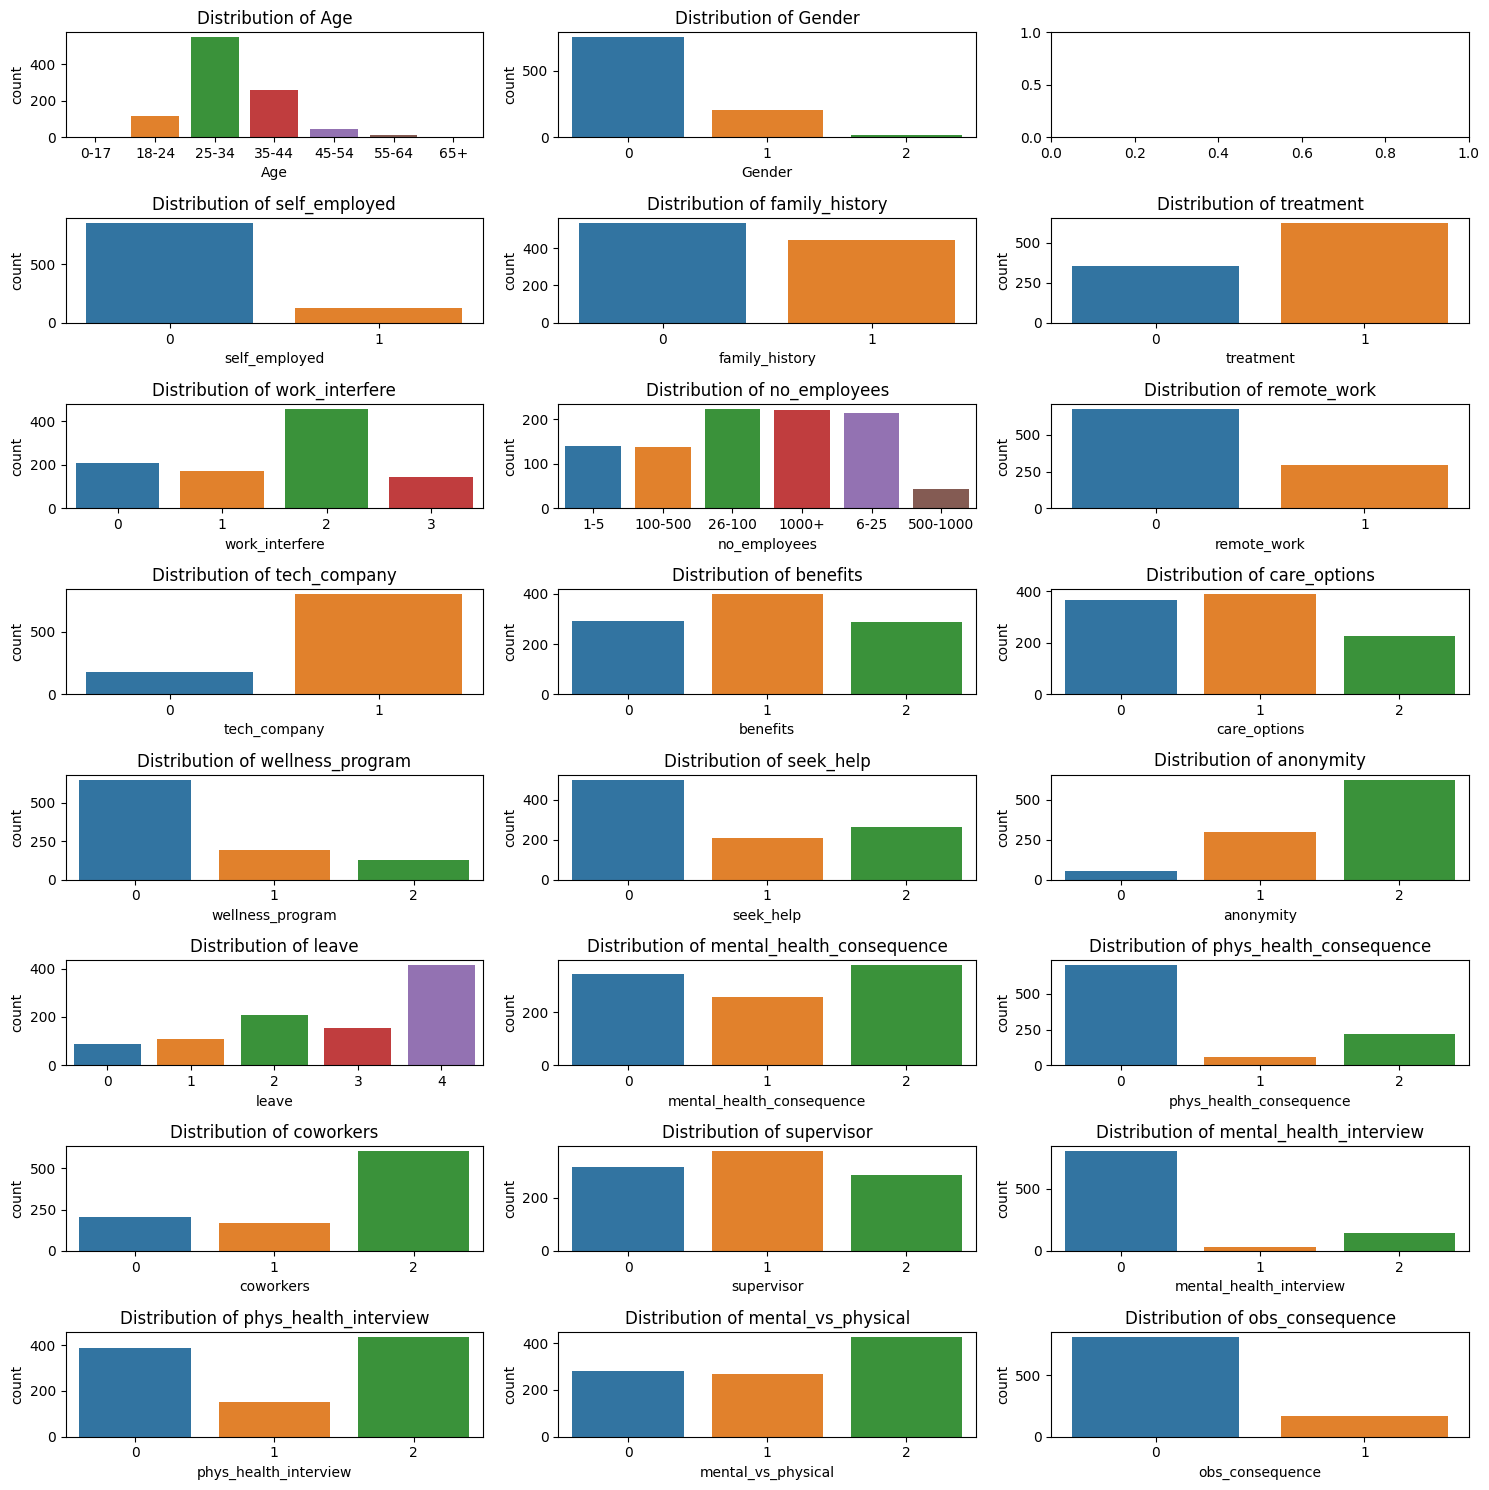

In [259]:
# calculate the number of rows and columns needed
df = pd.DataFrame(data)
num_cols = 3 # adjust the number of columns as needed
num_rows = int((df.shape[1] - 3)/ num_cols) + 1

# create a new figure with subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

# loop through each column and plot a histogram
for i, col in enumerate(df.columns):
    if(col == "Timestamp" or col == "comments" or col == "Country"):
        continue
    # get the current axis
    ax = axs[int(i / num_cols), i % num_cols]
    # plot the histogram
    sns.countplot(x=col, data=df, ax=ax)
    # set the title
    ax.set_title(f'Distribution of {col}')
    
# adjust the layout of the subplots
plt.tight_layout()

# show the plot
plt.show()

### Feature Engineering

### Model Selection 

### Model Training and evaluation 

### Model tuning

### Conclusions